# Final assignment



---



## Problem 1

A window is being built and the bottom is a rectangle and the top is a semicircle. If there is 12 m of framing materials what must the dimensions of the window be to make the window area as big as possible?

Model the decision problem as an optimization problem and solve it with a method of your choosing. **Analyze the result!**

 **Solution**:

 - As a first thing, i wrote down a problem and define optimization problem:

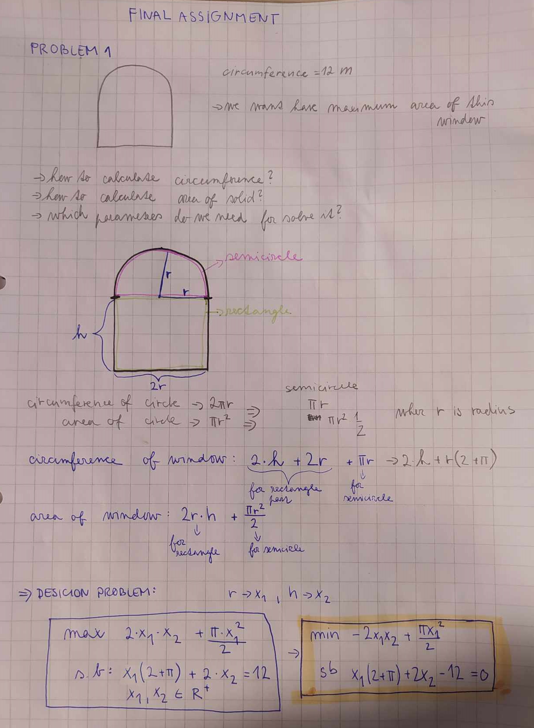

- As a second thing, i chose method for solving this problem. I decided to make it simple - i used penalty function method from exercite 4. Here is code:

In [ ]:
# definition of problem
import math
def f_constrained(x):
  return - 2*x[0]*x[1] + (math.pi*x[0]**2)/2, [], [x[0]*(2+math.pi) + 2*x[1] - 12]

In [ ]:
def alpha(x,f): # define penalty function
    (_,ieq,eq) = f(x)
    return sum([min([0,ieq_j])**2 for ieq_j in ieq])\
+sum([eq_k**2 for eq_k in eq])

def penalized_function(x,f,r): # combine objective and penalty functions
    return f(x)[0] + r*alpha(x,f)

In [ ]:
start = [0,0] # starting point

import numpy as np
from scipy.optimize import minimize
r = 1 # initialize penalty parameter
x_old = np.array([float('inf')]*2)
x_new = start
steps = []
while np.linalg.norm(x_new-x_old)>0.0001: # stopping rule where the difference in the variable space is monitored
    x_old = x_new
    res = minimize(lambda x:penalized_function(x,f_constrained,r),
               x_old,method='Nelder-Mead') # solve penalty problems by using Nelder Mead from scipy.optimize
    x_new = np.array(res.x)
    steps.append(list(x_new))
#    r = r+1 # update penalty parameter; increase it with the penalty function
    r = 10*r
print(x_new) # print final solution

[0.89388104 3.70201608]


- so result is: for radius (x1) is optimal value 0.8939 and for height of sides of window (x2) it's 3.7020
- let's test if result is correct:

In [ ]:
# let check condition that cirumference is 12
r = 0.89388104
h = 3.70201608
result = r * (2 + math.pi)  + 2 * h
print(result)

12.000004348447204


**Conclusion**

I found optimal values for dimensions of window. For radius of semicircle it is 0.89388104, what leads to that bottom side has length 2* this radius. And height of rectangle part of windwos has 3.70201608 m.

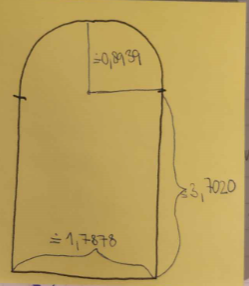



---



## Problem 2

The 10-dimensional Robsenbrock function (one of the variants) is defined as
$$
f(\mathbf{x}) = \sum_{i=1}^{9} 100 (x_{i+1} - x_i^2 )^2 + (1-x_i)^2
$$
for $x\in\mathbb R^{10}$.

Compare at least two different optimization method's performance in minimizing this function over $\mathbb R^{10}$. You can decide the method of comparison as the one that makes most sense to you. **Analyze the results!**

**Solution**

- as a first thing i define function:

In [ ]:
# definition of function
def f_rosenb(x):
  res = 0
  for i in range(0,9):
    res += 100 * (x[i+1] - x[i]**2)**2 + (1-x[i])**2
  return res

- as second thing, i decided to use different minimizing method from package scipy.optimize and compare their preformane. I read this documentation: https://docs.scipy.org/doc/scipy/tutorial/optimize.html#broyden-fletcher-goldfarb-shanno-algorithm-method-bfgs and simple try all suitable approaches for unconstrained optimization to see how they works.

In [ ]:
from scipy.optimize import minimize
from autograd import grad, hessian

- I define strarting point to search minimim and also derivation and hessian for use in different methods.


In [ ]:
x_start = [-3,5,2,-2,4,0,1,6,-2,4]
jacobian = grad(f_rosenb)
hessi = hessian(f_rosenb)

- Powell method - reached the minimum in not that much iterations, but it took too many function evalutations. This is probably one of the most simple method, i tried this one just to comapare this method to another method using gradinet

In [ ]:
res = minimize(f_rosenb, x_start, method='Powell',
         options={'disp': True})
print("-------- VALUES: --------")
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 61
         Function evaluations: 6597
-------- VALUES: --------
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- Nelder-mead method wasn't succesfull - it is probalby caused that this doesn't use any gradinet evalutation, and it takes a lot of time .... it is reason why it took to many iteration for evaluate this problem and reached maximum. As we can see reached values in maximum number of function evaluation is not really good.... just for comparions eith powell method.

In [ ]:
res = minimize(f_rosenb, x_start, method='nelder-mead',
         options={'disp': True})
print("-------- VALUES: --------")
print(res.x)

-------- VALUES: --------
[ 0.54499235  0.26503543 -0.73668096  0.85235441  0.47319691  0.00723105
  0.31889339 -0.12684906 -0.68654793  0.32338537]


<ipython-input-80-68967418aeaa>:1: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res = minimize(f_rosenb, x_start, method='nelder-mead',


- Conjugate gradient method use only first derivatives. I tried both apporaches - without given derivatives and with given derivatives. As we can see on results below, approach with given derivatives took less iterations, a lot less function evaluations and also less gradinet evaluations.

  Without gradient information:

    ```
    Iterations: 303
    Function evaluations: 5907
    Gradient evaluations: 537
    ```

  With gradient information:

    ```
    Iterations: 245
    Function evaluations: 429
    Gradient evaluations: 429
    ```
    
  Also, it seems that apporach with gradient information is little more precise. So use derivates definitelly paid off.





In [ ]:
# without gradient
res = minimize(f_rosenb, x_start, method='CG',
         options={'gtol': 1e-8,'disp': True})
print("-------- VALUES: --------")
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 303
         Function evaluations: 5907
         Gradient evaluations: 537
-------- VALUES: --------
[0.99999995 0.99999992 0.99999986 0.99999976 0.99999955 0.99999914
 0.99999831 0.99999665 0.99999331 0.99998661]


In [ ]:
# with gradient
res = minimize(f_rosenb, x_start, method='CG',
         options={'gtol': 1e-8,'disp': True}, jac=jacobian)
print("-------- VALUES: --------")
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 245
         Function evaluations: 429
         Gradient evaluations: 429
-------- VALUES: --------
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- Newton-Conjugate-Gradient method use both - jacobian and hessian. As we can see results, it took not that much iterations, function, gradinet and hessian evaluations, but the result isn't that good at some points (doesn't reach minimum)

In [ ]:
res = minimize(f_rosenb, x_start, method='Newton-CG',
               options={'disp': True}, jac=jacobian, hess=hessi)
print("-------- VALUES: --------")
print(res.x)

Optimization terminated successfully.
         Current function value: 3.986579
         Iterations: 78
         Function evaluations: 83
         Gradient evaluations: 83
         Hessian evaluations: 78
-------- VALUES: --------
[-0.99326313  0.99660555  0.99823963  0.99898645  0.99922208  0.99906509
  0.99843538  0.9970182   0.99410312  0.98824055]


- Trust-Region Newton-Conjugate-Gradient algorithm take little more iterations and evalutations but results are better, at all result is correct (reached minimum)

In [ ]:
res = minimize(f_rosenb, x_start, method='trust-ncg',
               jac=jacobian, hess=hessi,
               options={'gtol': 1e-8,'disp': True})
print("-------- VALUES: --------")
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 90
         Function evaluations: 91
         Gradient evaluations: 82
         Hessian evaluations: 81
-------- VALUES: --------
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- Trust-Region Nearly Exact Algorithm is used for medium-size problems. I also tried some another methods(trust-krylov) but all was approximately the same as this one, aybe with more interations and evalutaions. This one took less iterations and evalutaions comparing to previous method, but has the same result as newton-cg method.

In [ ]:
res = minimize(f_rosenb, x_start, method='trust-exact',
               jac=jacobian, hess=hessi,
               options={'gtol': 1e-8, 'disp': True})
print("-------- VALUES: --------")
print(res.x)

Optimization terminated successfully.
         Current function value: 3.986579
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 41
         Hessian evaluations: 51
-------- VALUES: --------
[-0.99326337  0.99660604  0.99824061  0.99898843  0.99922615  0.99907365
  0.99845418  0.99705625  0.99417938  0.98839263]


**Conclusion**
- when i consider all used method which i tried, and i choose only tree with best results, result are shown in this table:
      
                    | Powell |   CG    |trust-ncg|
      iteration     |   61   |   245   |    90   |
      function eval |  6597  |   429   |    91   |
      gradinet eval |   -    |   429   |    82   |
      hessian eval  |   -    |    -    |    81   |
    
- it can be quite a hard comapre this three method while one of them is gradient-free method, another use only jacobian and third one use jacobian and hessian. So i can say thet it depends of which kind of information we have: if we doesn't have information about gradinet, it is suitable use powell method, it has also low number of interations but on the other hand it comes with higher number of function evaluations. If we have information about gradinet, it is good use trust-ncg method while it took less of all evaluations. CG method could be used when we have informations just about jacobina and no Hessian. **But at all, for this example, i can say the best option is trust-ncg while it is not hard to find infromation about gradinet**






---



## Problem 3

Study biobjective optimization problem
$$
\begin{align}
\min \ &(\|x-(1,0)\|,\|x-(0,1)\|)\\
\text{s.t. }&x\in \mathbb R^2.
\end{align}
$$
Try to generate an evenly spread representation of the Pareto front. Plot the results in both the decision and objective spaces. **Analyze the results!**

**Solution:**
- As first thing, i define problem:

In [ ]:
def opt_problem(x):
    return [
            ((x[0] - 1)**2 + x[1]**2)**0.5,
            (x[0]**2 + (x[1] - 1)**2)**0.5
        ]

- i just used code from lecutre to calculate ideal and nadir vector, just for make sure others calculations of pareto front make sense.

In [ ]:
def calc_ideal(f):
    ideal = [0]*2 #Because there are 2 objectives
    solutions = [] #list for storing the actual solutions, which give the ideal

    starting_point = [0.5,0.5]
    for i in range(2):
        res=minimize(
            #Minimize each objective at the time
            lambda x: f(x)[i], starting_point, method='SLSQP'
            #,bounds = bounds # no bounds, while x belong all real numbers
            ,options = {'disp':True, 'ftol': 1e-20, 'maxiter': 1000})
        solutions.append(f(res.x))
        ideal[i]=res.fun
    return ideal,solutions

In [ ]:
ideal, solutions= calc_ideal(opt_problem)
print("-------------results------------")
for solution in solutions:
    print(solution)

Iteration limit reached    (Exit mode 9)
            Current function value: 1.0085928503107291e-08
            Iterations: 1000
            Function evaluations: 11881
            Gradient evaluations: 1000
Iteration limit reached    (Exit mode 9)
            Current function value: 7.0009133170408485e-09
            Iterations: 1000
            Function evaluations: 12768
            Gradient evaluations: 1000
-------------results------------
[1.0085928503107291e-08, 1.4142135630234072]
[1.414213566815316, 7.0009133170408485e-09]


- ideal is = [0,0] and nadir is = [1.41, 1.41]

- I made a little research and find this Platypus python library, which is used for multiobjective optimization. I read this documentation: https://platypus.readthedocs.io/en/latest/getting-started.html#defining-unconstrained-problems , and according to example in it, I create my own problem and solve this problem using platypus. It looked for me like a good idea, while on lectures we use some methods and test them on exercices and this is opportunity to learn some new techniqes for multiobjective optimization.

In [ ]:
!pip install platypus-opt

In [ ]:
from platypus import NSGAII, DTLZ2, Problem, Real

# define the problem definition
problem = Problem(2, 2)
problem.types[:] = Real(0, 10)
problem.function = opt_problem

# instantiate the optimization algorithm
algorithm = NSGAII(problem)

# optimize the problem using 10,000 function evaluations
algorithm.run(10000)

- visualizing results in objective space

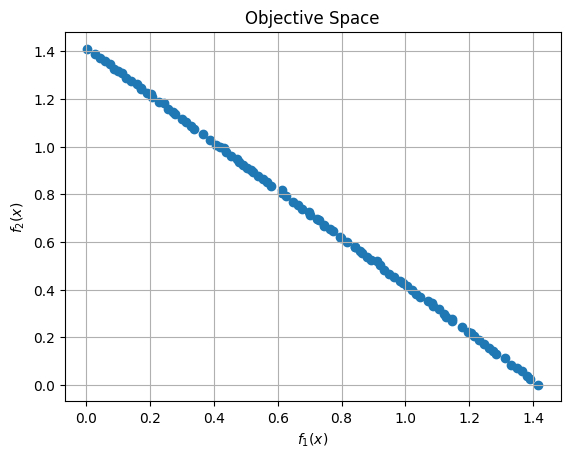

In [ ]:
import matplotlib.pyplot as plt

plt.scatter([s.objectives[0] for s in algorithm.result],
            [s.objectives[1] for s in algorithm.result])
plt.xlabel("$f_1(x)$")
plt.ylabel("$f_2(x)$")
plt.grid(True)
plt.title("Objective Space")
plt.show()

- visualizing results in desicion space

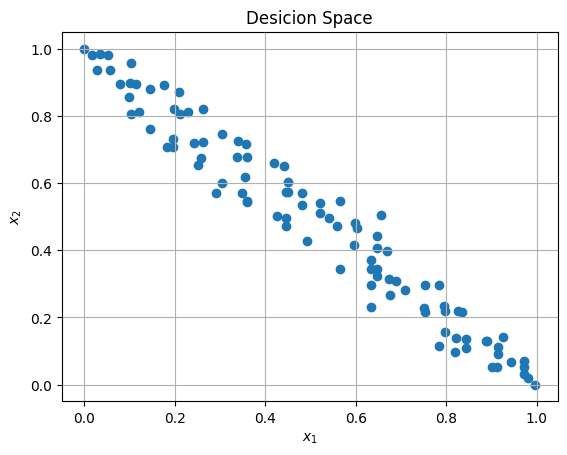

In [ ]:
import matplotlib.pyplot as plt

plt.scatter([s.variables[0] for s in algorithm.result],
            [s.variables[1] for s in algorithm.result])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.title("Desicion Space")
plt.show()

**Conclusion**

- As we can see, pareto front is kind of linear and also values of disicion varialbe too. So it means, that among the function values of the objective functions, there is a clear inverse proportion. The higher the value of one objective function increases, the lower the value of the other decreases, it's direct traid off.



---



## Problem 4

Find an application of stochastic multiobjective optimization in a scientific paper. Use DESDEO framework to create a problem object for your problem. Then, test your implementation (with real or artificial data) and find the ideal and nadir vectors by using available tools in DESDEO.

**Solution**
- it was hard for me to find some good papers with stochastic optimization problem which i was able to define. I make a lot of research and finaly found this paper: https://www.sciencedirect.com/science/article/pii/S1877050911002110 which is aim to trust-region algorithm for biobjective stochastic optimization which i read breafly. In 3. section of article there was defined problem in order to test trust-region algorithm, which i tried to solve here below. I tried to define this problem in desdeo and calculate optimal and nadir vector. But while in this problem are some stochastic values i wasn't able to solve this problem. It wasn't possible to calculate ideal and nadir vectors. So, as i read in this article, i tried sample average approximation (SAA) approach which was also described into this paper. I'm not sure if i did it absolutely correclty, but instead of every single time generating new random variable, i create one number - avarage of generated samples and use this number as deterministic value. After this change, i was able to reach some results below. And in order to success in calculating results, i also set lower and upper boundris for variables.

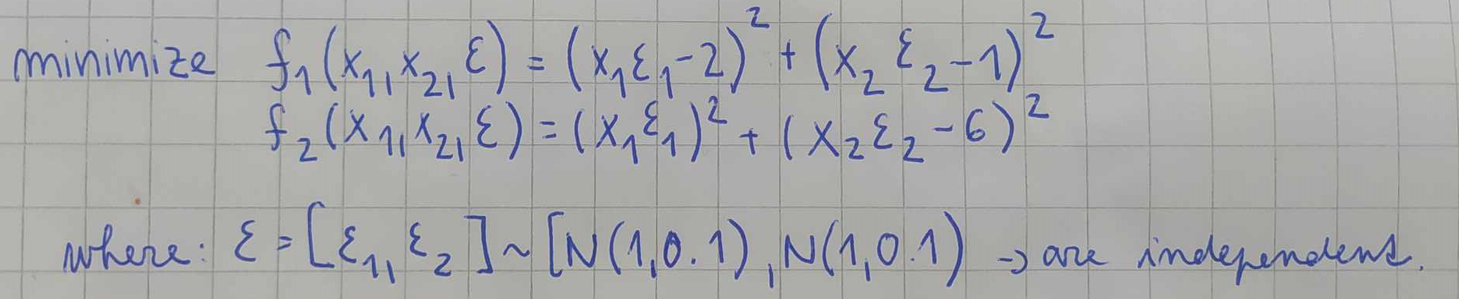

In [ ]:
!pip install desdeo

In [ ]:
# creating for avaraged random variables used in optimization problem below.
n = 10000
nums = [0,0,0,0]
for i in range(4):
  num = 0
  for j in range(n):
    num += np.random.normal(1, 0.1)
  nums[i] = num / n
print(nums)

[0.9999418438599047, 0.9998757395306999, 1.0001002826512473, 0.9998212787786277]


In [ ]:
# defining problem into desdeo
import numpy as np
from desdeo_problem.problem import MOProblem
from desdeo_problem.problem.Variable import variable_builder
from desdeo_problem.problem.Objective import ScalarObjective
from desdeo_problem.problem.Constraint import ScalarConstraint

def f_1(x):
    x = np.atleast_2d(x)
    #xi = np.random.normal(1, 0.1, size=(1, 2)) # while this part of optimization problem caused unsuccesfull result, i tried this deterministic approach below
    xi = [nums[0], nums[1]]
    xi = np.atleast_2d(xi)
    return (x[:, 0] * xi[:, 0] - 2)**2 + (x[:, 1] * xi[:, 1] - 1)**2

def f_2(x):
    x = np.atleast_2d(x)
    #xi = np.random.normal(1, 0.1, size=(1, 2))
    xi = [nums[2], nums[3]]
    xi = np.atleast_2d(xi)
    return (x[:, 0] * xi[:, 0])**2 + (x[:, 1] * xi[:, 1] - 6)**2

varsl = variable_builder(
    ["x1", "x2"],
    initial_values=[5, 5],
    lower_bounds=[-n, -n],
    upper_bounds=[n, n],
)

f1 = ScalarObjective(name="obj1", evaluator=f_1, maximize=False)
f2 = ScalarObjective(name="obj2", evaluator=f_2, maximize=False)

problem = MOProblem(variables=varsl, objectives=[f1, f2])

In [ ]:
# calculating nadir and ideal vector
from desdeo_mcdm.utilities import payoff_table_method

ideal, nadir = payoff_table_method(problem)

problem.ideal = ideal
problem.nadir = nadir

In [ ]:
print(f"ideal: {ideal}")
print(f"nadir: {nadir}")

ideal: [6.93334780e-29 2.83989926e-29]
nadir: [29.00326834 29.00181236]


**Conclusion**
- in bound problem i found ideal vector =~ [0,0] and nadir vecotr =~ [29, 29]